### Hands-On PMML ### 

mnist + keras

In [1]:
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))
model1.save('mnist+keras.h5')
model1.evaluate(X_test,y_test)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8258 - loss: 0.6673 - val_acc: 0.9413 - val_loss: 0.2132
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - acc: 0.9421 - loss: 0.1991 - val_acc: 0.9537 - val_loss: 0.1568
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - acc: 0.9579 - loss: 0.1472 - val_acc: 0.9633 - val_loss: 0.1299
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - acc: 0.9663 - loss: 0.1175 - val_acc: 0.9657 - val_loss: 0.1171
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9711 - loss: 0.1001 - val_acc: 0.9677 - val_loss: 0.1089
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9763 - loss: 0.0832 - val_acc: 0.9707 - val_loss: 0.0960
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9802 - loss: 0.0693 - val_acc: 0.9704 - val_loss: 0.0946
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - acc: 0.9809 - loss: 0.0645 - val_acc: 0.9736 - val_loss: 0.0893
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - acc: 0.9687 - loss: 0.1089


[0.09364833682775497, 0.9725000262260437]

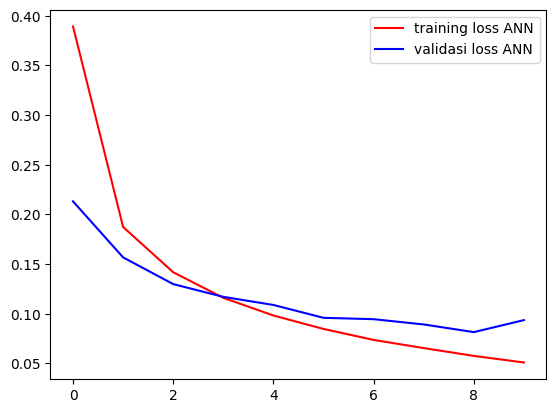

In [4]:
import matplotlib.pyplot as plt
epochs = range(10)
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']
plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [5]:
import numpy as np
from keras.models import load_model
model_simpan = load_model('mnist+keras.h5')
pred = model_simpan.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
label actual: 3
label prediction: 3
